## Importing the required libraries

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading Train and Test data

In [384]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_Df64byy.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_YCcRUnU.csv")

### Train data

In [385]:
train.head(5).append(train.tail(5))

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


### Test Data

In [386]:
test.head(5).append(test.tail(5))

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0
21804,72687,C2,3617,Owned,Individual,73,73,No,X2,14+,2.0,3,23040.0


### Train data Info

In [387]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [388]:
## Number of Rows and Columns 

print("Number of rows = ",train.shape[0])
print("Number of columns = ",train.shape[1])

Number of rows =  50882
Number of columns =  14


### Data Cleaning and Pre-Processing

#### Cleaning 'Holding_Policy_Duration' - Removal of '+' signs 

In [389]:
train['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [390]:
test['Holding_Policy_Duration'].value_counts()

14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

#### Converting 14+ to 15

In [391]:
train['Holding_Policy_Duration'].replace({'14+':'15'},inplace=True)
test['Holding_Policy_Duration'].replace({'14+':'15'},inplace=True)

#### Converting 'Holding_Policy_Duration' to float datatype

In [392]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype('float')
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype('float')

In [393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  float64
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(3), int64(6

In [394]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  float64
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.2+ MB


#### Dropping the ID Column

In [395]:
train.drop('ID',axis=1,inplace=True)

#### Variable Types

In [396]:
# Types of variables

num = ['Upper_Age', 'Lower_Age','Holding_Policy_Duration','Reco_Policy_Premium']
cat =['Region_Code','Holding_Policy_Type', 'Reco_Policy_Cat','City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator','Response']


print("Numerical Features are :",num)
print("\n\n")
print("Categorical Features are :",cat)

Numerical Features are : ['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium']



Categorical Features are : ['Region_Code', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Response']


#### Five-point summary for numerical variables

In [397]:
train[num].describe()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium
count,50882.000000,50882.000000,30631.000000,50882.000000
mean,44.856275,42.738866,6.156769,14183.950069
std,17.310271,17.319375,4.758830,6590.074873
min,18.000000,16.000000,1.000000,2280.000000
25%,28.000000,27.000000,2.000000,9248.000000
50%,44.000000,40.000000,5.000000,13178.000000
75%,59.000000,57.000000,9.000000,18096.000000
max,75.000000,75.000000,15.000000,43350.400000


#### Check for missing values

In [398]:
train.isnull().sum()/len(train)*100

City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

- Nearly 22.97% data are missing in Helath Indicator
- 39.79% data missing in both Holding_Policy_Duration and Holding_Policy_Type features respectively

In [399]:
test.isnull().sum()/len(test)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

- Nearly 23.05% data are missing in Helath Indicator
- 39.45% data missing in both Holding_Policy_Duration and Holding_Policy_Type features respectively

#### Filling NULL values with mode of 'Health Indicator' 

In [400]:
train["Health Indicator"] = train["Health Indicator"].fillna("Missing")
test["Health Indicator"] = test["Health Indicator"].fillna("Missing")

In [401]:
train.groupby(['Health Indicator'])[['Upper_Age','Lower_Age']].mean() 
# Mean Upper_Age and Lower_Age is matching for Missing data and X1
# So, replacing Missing data with X1

,Upper_Age,Lower_Age
Health Indicator,,
Missing,44.994184,42.895133
X1,44.227133,42.186241
X2,45.487805,43.430701
X3,43.473824,41.241201
X4,45.460561,43.373324
X5,47.964679,45.607991
X6,44.161719,41.528125
X7,51.056122,48.688776
X8,47.423077,44.153846


In [402]:
train["Health Indicator"] = train["Health Indicator"].replace({'Missing':'X1'})
test["Health Indicator"] = test["Health Indicator"].replace({'Missing':'X1'})

#### Filling NULL values with mode of 'Holding_Policy_Type' 

In [403]:
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].fillna(train['Holding_Policy_Type'].agg(pd.Series.mode)[0])
test["Holding_Policy_Type"] = test["Holding_Policy_Type"].fillna(test['Holding_Policy_Type'].agg(pd.Series.mode)[0])

In [404]:
train["Holding_Policy_Type"].value_counts()

3.0    33530
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

#### Replacing NULL Holding_Policy_Duration  values with mean of Holding_Policy_Duration  for each Holding_Policy_Type

In [405]:
train['Holding_Policy_Duration'].isnull().sum()

20251

In [406]:
train.groupby('Holding_Policy_Type')['Holding_Policy_Duration'].mean()

Holding_Policy_Type
1.0    5.101309
2.0    5.981019
3.0    6.748174
4.0    6.552707
Name: Holding_Policy_Duration, dtype: float64

In [407]:
test.groupby('Holding_Policy_Type')['Holding_Policy_Duration'].mean()

Holding_Policy_Type
1.0    5.043089
2.0    6.042791
3.0    6.836683
4.0    6.642707
Name: Holding_Policy_Duration, dtype: float64

In [408]:
train[train['Holding_Policy_Type']==1.0]['Holding_Policy_Duration'].isnull().sum()

0

In [409]:
train[train['Holding_Policy_Type']==2.0]['Holding_Policy_Duration'].isnull().sum()

0

In [410]:
train[train['Holding_Policy_Type']==3.0]['Holding_Policy_Duration'].isnull().sum()

20251

In [411]:
train[train['Holding_Policy_Type']==4.0]['Holding_Policy_Duration'].isnull().sum()

0

In [412]:
test[test['Holding_Policy_Type']==1.0]['Holding_Policy_Duration'].isnull().sum()

0

In [413]:
test[test['Holding_Policy_Type']==2.0]['Holding_Policy_Duration'].isnull().sum()

0

In [414]:
test[test['Holding_Policy_Type']==3.0]['Holding_Policy_Duration'].isnull().sum()

8603

In [415]:
test[test['Holding_Policy_Type']==4.0]['Holding_Policy_Duration'].isnull().sum()

0

- Only for Holding_Policy_Type =3.0, there are missing values in Holding_Policy_Duration. 
- This can be replaced with mean value of duration for that particulat policy type.

In [416]:
mean_train = train[train['Holding_Policy_Type']==3.0]['Holding_Policy_Duration'].mean()
mean_train

6.748173808268695

In [417]:
mean_test = test[test['Holding_Policy_Type']==3.0]['Holding_Policy_Duration'].mean()
mean_test

6.836683417085427

In [418]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(mean_train)
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(mean_test)

In [419]:
train.isnull().sum()/len(train)*100

City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

In [420]:
test.isnull().sum()/len(train)*100

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
dtype: float64

### Checking Outliers in the data

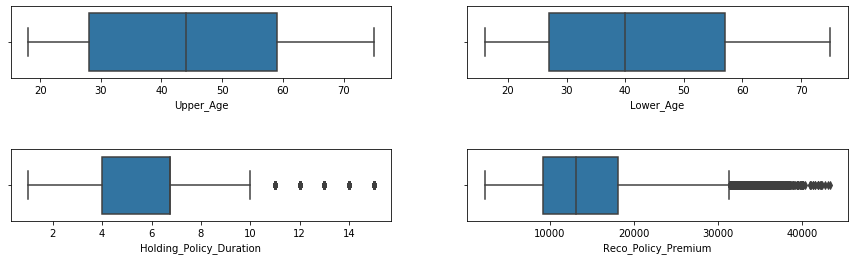

In [421]:
plt.figure(figsize=(15,25))

for i,j in enumerate (num):
    plt.subplot(10,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.boxplot(train[j])

- There are outliers in Reco_Policy_Premium feature

#### Checking Class Imbalance

In [422]:
train['Response'].value_counts()/train['Response'].count()*100

0    76.005267
1    23.994733
Name: Response, dtype: float64

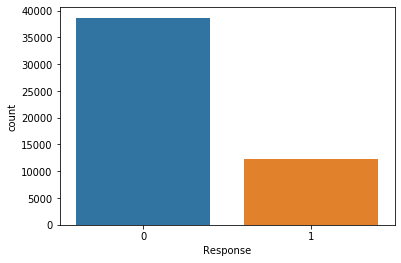

In [423]:
sns.countplot(train.Response)
plt.show()

In [424]:
train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

#### Checking Correlation among features

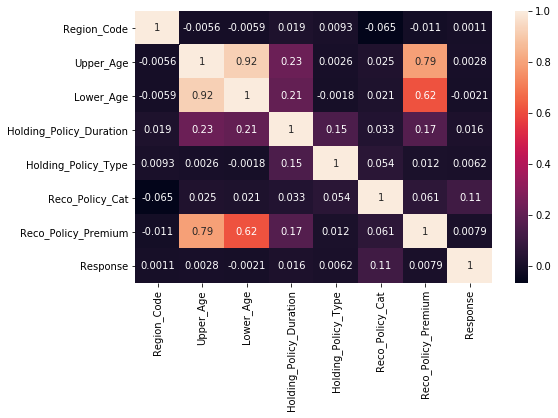

In [425]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

- We can observe that none of the features are stringly correlated with the target 'Response'
- Also, the features 'Upper_Age' and 'Lower_Age' have strong positive correlation bewteen them.
- Therefore, we can either choose to drop one feature or create a new derived feature

#### Dropping City_Code

In [426]:
train.drop('City_Code',1,inplace=True)
test.drop('City_Code',1,inplace=True)

#### Dropping Lower_Age

In [427]:
train.drop('Lower_Age',1,inplace=True)
test.drop('Lower_Age',1,inplace=True)

### Feature Engineering

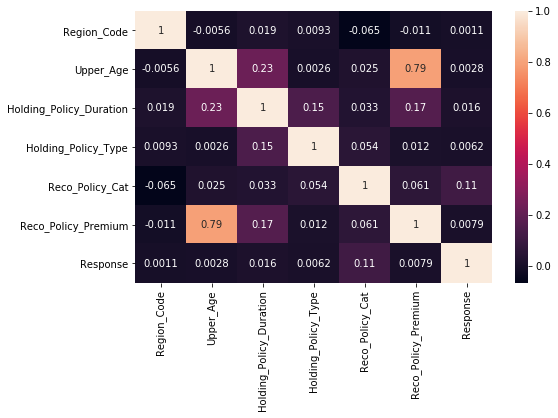

In [428]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

#### Age Distribution of Customers

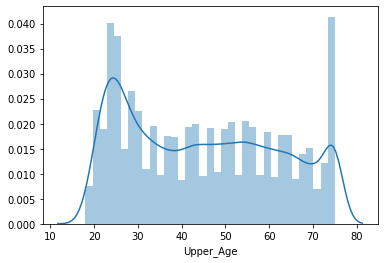

In [429]:
sns.distplot(train.Upper_Age)
plt.show()

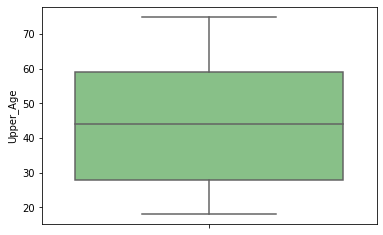

In [430]:
sns.boxplot(y = 'Upper_Age', data = train,palette='Accent')
plt.show()

#### Age Vs Annual premium

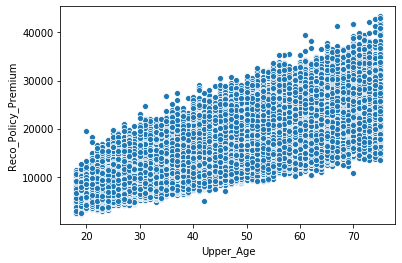

In [431]:
sns.scatterplot(x=train['Upper_Age'],y=train['Reco_Policy_Premium'])
plt.show()

#### Reco_Policy_Premium Distribution

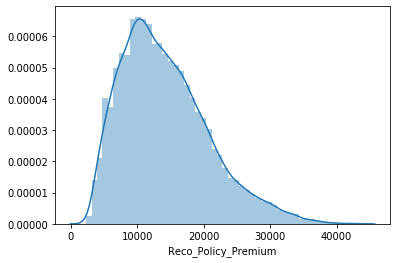

In [432]:
sns.distplot(train.Reco_Policy_Premium)
plt.show()

#### Accomodation_Type Vs Annual premium

In [433]:
df=train.groupby(['Accomodation_Type','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Accomodation_Type,Response,count
0,Owned,0,21188
1,Owned,1,6763
2,Rented,0,17485
3,Rented,1,5446


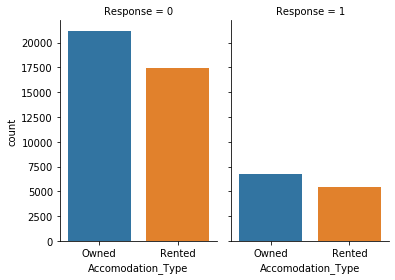

In [434]:
sns.catplot(x="Accomodation_Type", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)
plt.show()

#### Reco_Insurance_Type Vs Annual premium

In [435]:
df=train.groupby(['Reco_Insurance_Type','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Reco_Insurance_Type,Response,count
0,Individual,0,30896
1,Individual,1,9640
2,Joint,0,7777
3,Joint,1,2569


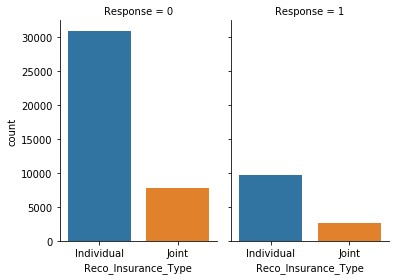

In [436]:
sns.catplot(x="Reco_Insurance_Type", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)
plt.show()

#### Is_Spouse Vs Annual premium

In [437]:
df=train.groupby(['Is_Spouse','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Is_Spouse,Response,count
0,No,0,32303
1,No,1,10157
2,Yes,0,6370
3,Yes,1,2052


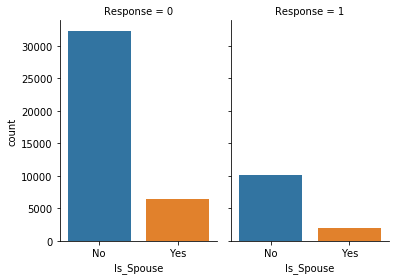

In [438]:
sns.catplot(x="Is_Spouse", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)
plt.show()

#### Health Indicator Vs Annual premium

In [439]:
df=train.groupby(['Health Indicator','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Health Indicator,Response,count
0,X1,0,18787
1,X1,1,5914
2,X2,0,7841
3,X2,1,2491
4,X3,0,5163
5,X3,1,1599
6,X4,0,4347
7,X4,1,1396
8,X5,0,1319
9,X5,1,408


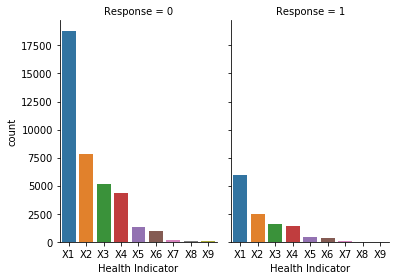

In [440]:
sns.catplot(x="Health Indicator", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)
plt.show()

#### Holding_Policy_Type Vs Annual premium

In [441]:
df=train.groupby(['Holding_Policy_Type','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Holding_Policy_Type,Response,count
0,1.0,0,6246
1,1.0,1,1927
2,2.0,0,3815
3,2.0,1,1190
4,3.0,0,25474
5,3.0,1,8056
6,4.0,0,3138
7,4.0,1,1036


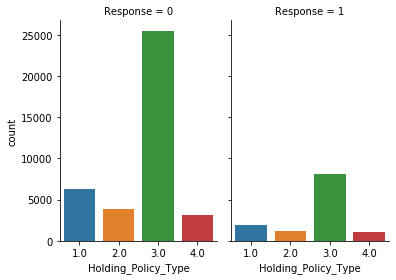

In [442]:
sns.catplot(x="Holding_Policy_Type", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)
plt.show()

#### Reco_Policy_Cat vs Annual premium

In [443]:
df=train.groupby(['Reco_Policy_Cat','Response'])['Region_Code'].count().to_frame().rename(columns={'Region_Code':'count'}).reset_index()
df

,Reco_Policy_Cat,Response,count
0,1,0,1959
1,1,1,8
2,2,0,1663
3,2,1,254
4,3,0,854
5,3,1,205
6,4,0,940
7,4,1,75
8,5,0,714
9,5,1,293


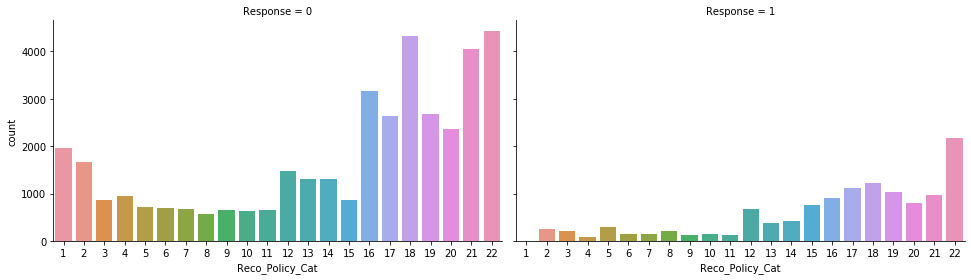

In [444]:
sns.catplot(x="Reco_Policy_Cat", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=1.7)
plt.show()

### Encoding Techniques

#### Changing Is_Spouse to int 

In [445]:
train['Is_Spouse'] = train['Is_Spouse'].map( {'Yes': 1, 'No': 0} ).astype(int)
test['Is_Spouse'] = test['Is_Spouse'].map( {'Yes': 1, 'No': 0} ).astype(int)

#### One-Hot Encoding

In [446]:
train =pd.get_dummies(train,drop_first=True)
test =pd.get_dummies(test,drop_first=True)

### Scaling Numerical Features

In [447]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()

train[['Upper_Age','Holding_Policy_Duration']] = ss.fit_transform(train[['Upper_Age','Holding_Policy_Duration']])
test[['Upper_Age','Holding_Policy_Duration']] = ss.fit_transform(test[['Upper_Age','Holding_Policy_Duration']])


mm = MinMaxScaler()
train[['Reco_Policy_Premium']] = mm.fit_transform(train[['Reco_Policy_Premium']])
test[['Reco_Policy_Premium']] = mm.fit_transform(test[['Reco_Policy_Premium']])




#### Converting the datatype of Categorical features to 'Str'

In [448]:
for column in ['Region_Code','Is_Spouse','Holding_Policy_Type','Reco_Policy_Cat','Accomodation_Type_Rented','Reco_Insurance_Type_Joint',
              'Health Indicator_X2','Health Indicator_X3','Health Indicator_X4','Health Indicator_X5',
              'Health Indicator_X6','Health Indicator_X7','Health Indicator_X8','Health Indicator_X9']:
    train[column] = train[column].astype('int')
    test[column] = test[column].astype('int')

In [449]:
train.head(2)

,Region_Code,Upper_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,3213,-0.511625,0,2.324194,3,22,0.227609,0,1,0,0,0,0,0,0,0,0,0
1,1117,1.741395,0,0.096130,3,22,0.687356,0,0,1,1,0,0,0,0,0,0,0


In [450]:
test.head(2)

,ID,Region_Code,Upper_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,50883,156,-0.862252,0,-0.120386,3,5,0.235009,0,0,0,0,0,0,0,0,0,0
1,50884,7,1.398027,1,-0.927508,3,18,0.722007,0,1,0,0,0,0,0,0,0,0


### Splitting the data into Train ans Test

In [451]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.25, random_state=42,stratify=train_target,shuffle=True)

In [452]:
test_id=test.ID

In [453]:
test=test.drop('ID',axis=1)

### Data Modelling and Evaluation

In [454]:
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

# import packages for hyperparameters tuning

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

### CatBoost

In [455]:
cat_col = ['Region_Code','Is_Spouse','Holding_Policy_Type','Reco_Policy_Cat','Accomodation_Type_Rented','Reco_Insurance_Type_Joint',
              'Health Indicator_X2','Health Indicator_X3','Health Indicator_X4','Health Indicator_X5',
              'Health Indicator_X6','Health Indicator_X7','Health Indicator_X8','Health Indicator_X9']

In [456]:
catb = CatBoostClassifier()
catb= catb.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=20,verbose=100)
y_pred = catb.predict(X_test)
proba = catb.predict_proba(X_test)[:, 1]
print('CatBoost Base Accuracy : {}'.format(accuracy_score(y_test,y_pred)))
print('CatBoost Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_test,proba)))

Learning rate set to 0.077906
0:	learn: 0.6672133	test: 0.6669975	best: 0.6669975 (0)	total: 101ms	remaining: 1m 40s
100:	learn: 0.4475322	test: 0.4398816	best: 0.4398816 (100)	total: 4.07s	remaining: 36.2s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.4382603777
bestIteration = 153

Shrink model to first 154 iterations.
CatBoost Base Accuracy : 0.7783979246914551
CatBoost Base ROC_AUC_SCORE: 0.8023389053150771


## Evaluating on Test data

In [457]:
Preds = [pred[1] for pred in catb.predict_proba(test)]

In [458]:
submission = pd.DataFrame(data = {'ID': test_id, 'Response': Preds})
submission.to_csv('catboost.csv', index = False)
submission.head(10)

,ID,Response
0,50883,0.066180
1,50884,0.098046
2,50885,0.439731
3,50886,0.072474
4,50887,0.052142
5,50888,0.103662
6,50889,0.426195
7,50890,0.428144
8,50891,0.114226
9,50892,0.172527
